In [44]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [45]:
car = pd.read_csv("car data.csv")

In [46]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [47]:
car.shape

(301, 9)

In [48]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [49]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [50]:
print(car.Fuel_Type.value_counts())
print(car.Selling_type.value_counts())
print(car.Transmission.value_counts())
print(car.Owner.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Owner
0    290
1     10
3      1
Name: count, dtype: int64


In [51]:
car.replace({'Fuel_Type' : {'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2}} , inplace = True)
car.replace({'Selling_type' : {'Dealer' : 0, 'Individual' : 1}} , inplace = True)
car.replace({'Transmission' : {'Manual' : 0, 'Automatic' : 1}} , inplace = True)

C:\Users\Vivek\AppData\Local\Temp\ipykernel_3216\3819234772.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car.replace({'Fuel_Type' : {'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2}} , inplace = True)
C:\Users\Vivek\AppData\Local\Temp\ipykernel_3216\3819234772.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car.replace({'Selling_type' : {'Dealer' : 0, 'Individual' : 1}} , inplace = True)
C:\Users\Vivek\AppData\Local\Temp\ipykernel_3216\3819234772.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be rem

In [52]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [53]:
X = car.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = car['Selling_Price']

In [54]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [55]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [57]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [58]:
training_data_prediction = lin_reg_model.predict(X_train)

In [59]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.8796483009370217


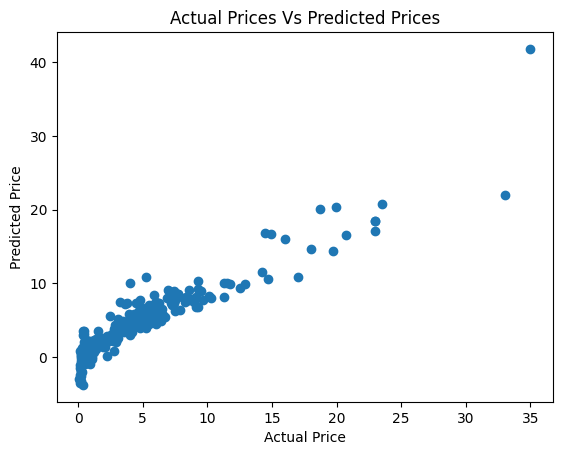

In [60]:
import matplotlib.pyplot as plt
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

In [61]:
test_data_prediction = lin_reg_model.predict(X_test)

In [62]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.8365861023209662


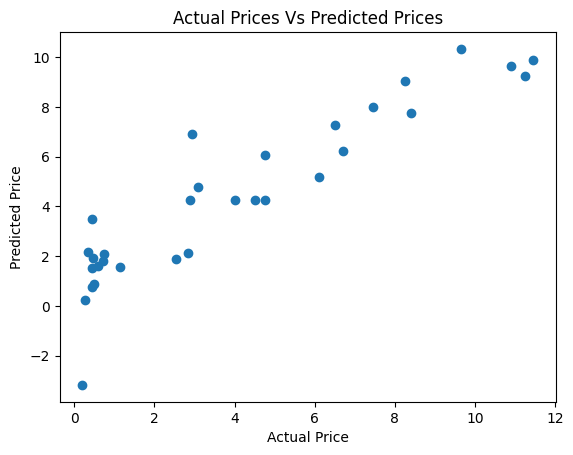

In [63]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()